# CS 1656 – Introduction to Data Science (Fall 2024) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Zi Han Ding

## Term Project 

**Released: March 20, 2024**

**Due: April 17, 2024**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [39]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

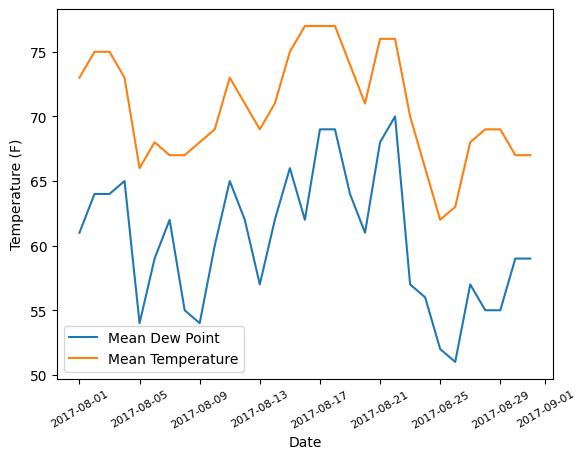

In [40]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [66]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])
def __init__(self, files):
        self.trips = self.produce_trips_table(files)
        print("Trips initialized:", isinstance(self.trips, pd.DataFrame))
        self.daily_counts = self.calculate_daily_counts(self.get_trips())
        self.monthly_counts = self.calculate_monthly_counts(self.get_trips())
        
    
def get_trips(self):
        return self.trips
        
    
def get_daily_counts(self):
        return self.daily_counts

def get_monthly_counts(self):
        return self.monthly_counts

### Task 1.1

In [69]:
trips = calculations.get_trips()
trips.head(5)

AttributeError: 'NoneType' object has no attribute 'head'

### Task 1.1

In [67]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

### Task 1.2

In [16]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

AttributeError: 'NoneType' object has no attribute 'head'

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [60]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046


### Task 2.1

In [70]:
# Filter the data for the specified month and stationID
filtered_data = daily_counts[(daily_counts['day'].dt.strftime('%m/%Y') == filter_month) & (daily_counts['station_id'] == filter_stationID)]

# Sort the data by 'fromCNT' in descending order and select the top 20 stations
top_20_stations = filtered_data.sort_values(by='fromCNT', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_stations['station_id'], top_20_stations['fromCNT'])
plt.xlabel('Station ID')
plt.ylabel('fromCNT')
plt.title('20 Most Popular Bike Stations (fromCNT) for {}'.format(filter_month))
plt.xticks(rotation=45)
plt.show()

TypeError: 'NoneType' object is not subscriptable

### Task 2.2

### Task 2.3

### Task 2.4

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

### Task 3.2

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

### Task 4.2

### Task 4.3

### Task 4.4